In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


In [3]:
df=pd.read_csv('/content/emails.csv')

In [4]:
x=df.drop('spam',axis=1)
y=df['spam']

Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.

The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.



In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
X_train

,text
4860,Subject: re : request for payroll reclassifica...
1520,Subject: re : pending approval for ibuyit requ...
2083,Subject: congratulations ! hi vince : i just...
527,Subject: secretly record all internet activity...
3113,"Subject: interviews scheduled for monday , nov..."
...,...
3772,Subject: john sherriff ' s copper position te...
5191,Subject: the national forum on corporate finan...
5226,"Subject: re : my first draft quentin , i for..."
5390,Subject: why johan dahl and the mri energy sta...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf_vec = TfidfVectorizer().fit(X_train['text'])
X_train_vec = tfidf_vec.transform(X_train['text'])
X_test_vec = tfidf_vec.transform(X_test['text'])

In [22]:
model= MultinomialNB()
model.fit(X_train_vec,y_train)

MultinomialNB()

In [23]:
y_pred=model.predict(X_test_vec)

(0.8762370343154765, 0.8516579406631762, 0.8276039264279006, None)


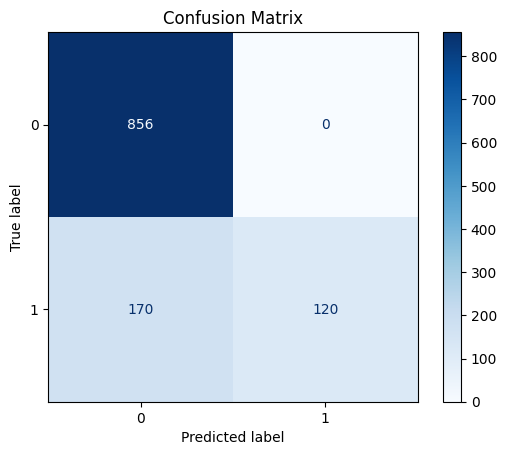

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()



In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=50, random_state=42)
rf.fit(X_train_vec,y_train)
print(rf.score(X_test_vec,y_test))
y_pred=rf.predict(X_test_vec)

0.9502617801047121


(0.9533670139864551, 0.9502617801047121, 0.9483527023434578, None)


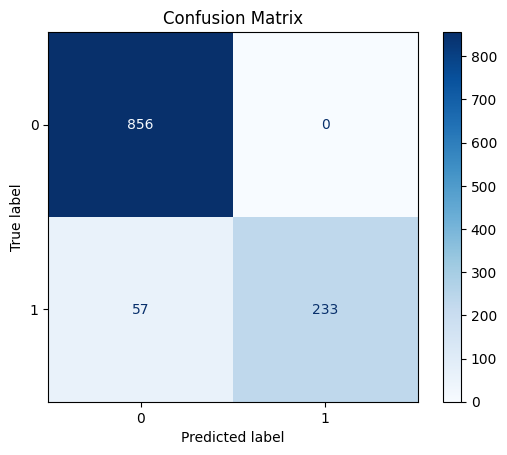

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [45]:
model=Sequential()
model.add(Dense(128,input_shape=(X_train_vec.shape[1],)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 128)            │     4,325,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,335,617 (16.54 MB)

 Trainable params: 4,335,617 (16.54 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train_vec,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 50s 92ms/step - accuracy: 0.7536 - loss: 2339.5374 - val_accuracy: 0.7775 - val_loss: 936.1016
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 0.7608 - loss: 846.6345 - val_accuracy: 0.7775 - val_loss: 397.3974
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.7565 - loss: 385.2866 - val_accuracy: 0.7775 - val_loss: 189.3622
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.7661 - loss: 164.5807 - val_accuracy: 0.7775 - val_loss: 72.6012
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.7746 - loss: 42.3499 - val_accuracy: 0.9324 - val_loss: 0.1565
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.9591 - loss: 0.1039 - val_accuracy: 0.9607 - val_loss: 0.0983
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9893 - loss: 0.0408 - val_accuracy: 0.9706 - val_loss: 0.0805
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.9949 - l

In [49]:
model.predict(X_test_vec)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


array([[1.4504026e-08],
       [2.3895167e-04],
       [3.4399017e-07],
       ...,
       [9.9593109e-01],
       [7.9385222e-07],
       [4.6540750e-05]], dtype=float32)

In [53]:
y_pred_prob = model.predict(X_test_vec)
y_pred = (y_pred_prob > 0.5).astype(int)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9668411867364747

(0.966712981743118, 0.9668411867364747, 0.9665243619840552, None)


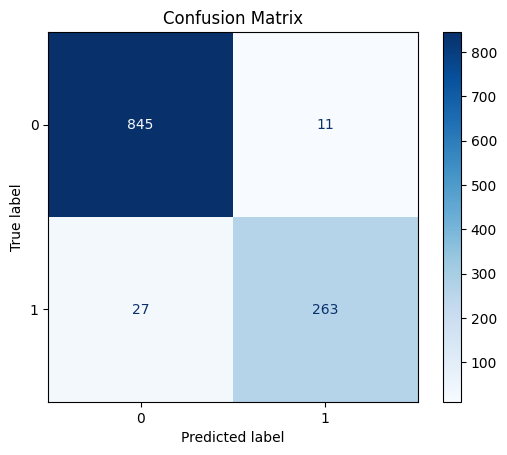

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [56]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train_vec,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.9718 - loss: 0.1010 - val_accuracy: 0.9935 - val_loss: 0.0179
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 89ms/step - accuracy: 1.0000 - loss: 4.3062e-04 - val_accuracy: 0.9945 - val_loss: 0.0169
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 1.0000 - loss: 7.7980e-05 - val_accuracy: 0.9956 - val_loss: 0.0165
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 1.0000 - loss: 6.0457e-05 - val_accuracy: 0.9956 - val_loss: 0.0160
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 1.0000 - loss: 4.4501e-05 - val_accuracy: 0.9956 - val_loss: 0.0158
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 1.0000 - loss: 3.0788e-05 - val_accuracy: 0.9945 - val_loss: 0.0149
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 1.0000 - loss: 1.0242e-05 - val_accuracy: 0.9945 - val_loss: 0.0168
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 1.00

In [57]:
y_pred_prob = model.predict(X_test_vec)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy_score(y_test,y_pred)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


0.9834205933682374

(0.9834943211131996, 0.9834205933682374, 0.9834486986546496, None)


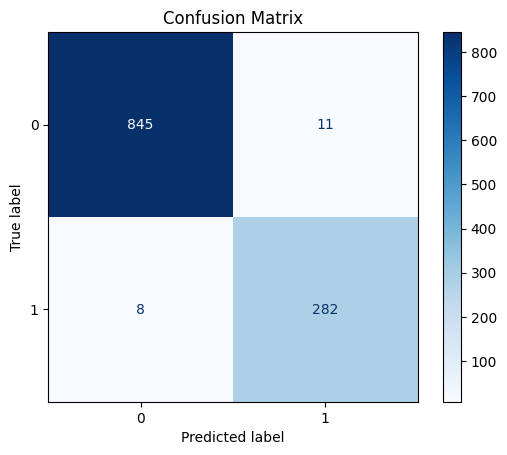

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [8]:
regr = LogisticRegression()
regr.fit(X_train_vec, y_train)
print(regr.score(X_test_vec, y_test))
y_pred = regr.predict(X_test_vec)

0.9781849912739965


(0.9786578045602317, 0.9781849912739965, 0.9778791867911389, None)


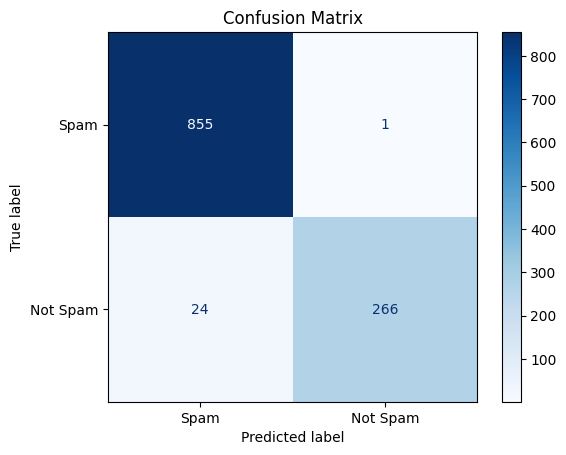

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Spam','Not Spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
